In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('application_data.csv')
col_desc = pd.read_csv('columns_description.csv')

In [ ]:
col_desc.shape

In [ ]:
col_desc.iloc[:, [2,3]]

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.dtypes

In [ ]:
df_null=round(df.isnull().sum()*100/len(df), 2)
df_null

In [11]:
null_v = df_null[df_null >= 30]
null_v

OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MOD

In [12]:
cols_to_drop = list(null_v.index)
cols_to_drop

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [13]:
df.drop(cols_to_drop, axis = 1, inplace = True)

In [14]:
df.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [15]:
df.shape

(307511, 72)

In [16]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [17]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [18]:
1.687979 * 100000

168797.9

In [19]:
upper = np.percentile(df['AMT_INCOME_TOTAL'], 75)
lower = np.percentile(df['AMT_INCOME_TOTAL'], 25)
upper, lower

(202500.0, 112500.0)

In [20]:
iqr = upper-lower
iqr

90000.0

In [21]:
ub = upper + (1.5 * iqr)
lb = lower - (1.5 * iqr)

In [22]:
ub

337500.0

In [23]:
lb


-22500.0

In [24]:
# filtering the data without outliers

df = df[(df['AMT_INCOME_TOTAL'] <= ub) & (df['AMT_INCOME_TOTAL'] >= lb)]

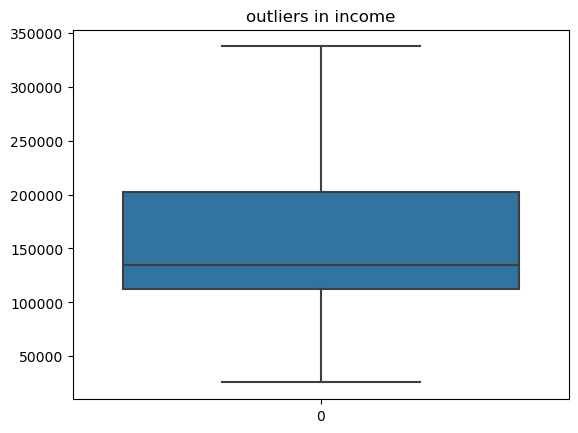

In [25]:
sns.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('outliers in income');

In [26]:
df['CNT_CHILDREN'].describe()

count    293476.000000
mean          0.414139
std           0.720161
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [27]:
upper = np.percentile(df['CNT_CHILDREN'], 75)
lower = np.percentile(df['CNT_CHILDREN'], 25)
upper, lower

(1.0, 0.0)

In [28]:
iqr = upper-lower
iqr


1.0

In [29]:
ub = upper + (1.5 * iqr)
lb = lower - (1.5 * iqr)

In [30]:
ub

2.5

In [31]:
lb


-1.5

In [32]:
# filtering the data without outliers

df = df[(df['CNT_CHILDREN'] <= ub) & (df['CNT_CHILDREN'] >= lb)]

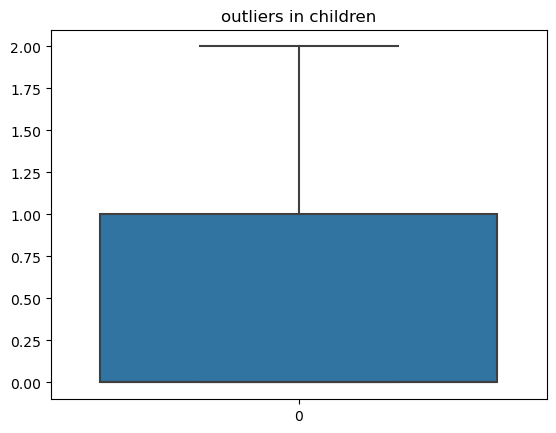

In [33]:
sns.boxplot(df['CNT_CHILDREN']);
plt.title('outliers in children');

In [34]:
def ol(data):
    q3= np.percentile(data,75)
    q1= np.percentile(data,25)
    iqr=q3-q1
    iqr
    ub = q3+(1.5*iqr)
    lb = q1-(1.5*iqr)

    return ub,lb

In [35]:
ub,lb=ol(df['AMT_INCOME_TOTAL'])

In [36]:
df = df[(df['AMT_INCOME_TOTAL'] <= ub) & (df['AMT_INCOME_TOTAL'] >= lb)]

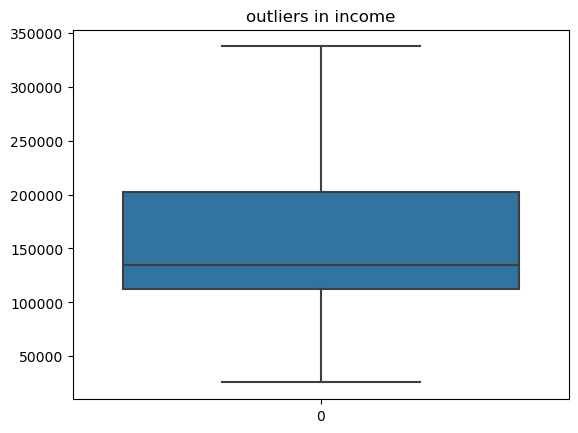

In [37]:
sns.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('outliers in income');